In [1]:
import pandas as pd

arquivo = pd.read_csv("Dados.csv")

display(arquivo.head(2))

,CODIGO_IES,NOME_IES,CATEGORIA_ADMINISTRATIVA,ORGANIZACAO_ACADEMICA,CODIGO_CURSO,NOME_CURSO,GRAU,AREA_OCDE,MODALIDADE,SITUACAO_CURSO,QT_VAGAS_AUTORIZADAS,CARGA_HORARIA,CODIGO_AREA_OCDE_CINE,AREA_OCDE_CINE,CODIGO_MUNICIPIO,MUNICIPIO,UF,REGIAO
0,4751,CENTRO UNIVERSITÁRIO UNIFATECIE,Privada com fins lucrativos,Centro Universitário,1556773,ENGENHARIA AGRONÔMICA,Bacharelado,Agronomia,Educação a Distância,Em atividade,1000,4400,301,Agronomia,3541406,Presidente Prudente,SP,SUDESTE
1,1491,CENTRO UNIVERSITÁRIO INTERNACIONAL,Privada com fins lucrativos,Centro Universitário,1186955,LETRAS,Licenciatura,Formação de professor de língua/literatura ver...,Educação a Distância,Em atividade,3000,3992,58,Formação de professor de língua/literatura ver...,2516201,Sousa,PB,NORDESTE


Os 10 primeiros cursos com maior quantidade de vagas liberadas em São paulo

In [3]:
df = pd.DataFrame(arquivo)



qt = df[df['MUNICIPIO'] == 'São Paulo']


faculdades_sp = qt[["MUNICIPIO", "AREA_OCDE_CINE", "QT_VAGAS_AUTORIZADAS",]].groupby(["MUNICIPIO","AREA_OCDE_CINE"]).sum()

qtt = faculdades_sp.sort_values(by='QT_VAGAS_AUTORIZADAS', ascending=False)

cursos_faculdades_sp = qtt.query('QT_VAGAS_AUTORIZADAS != 0')


display(cursos_faculdades_sp.head(10))

QT_VAGAS_AUTORIZADAS
MUNICIPIO AREA_OCDE_CINE                                                          
São Paulo Pedagogia                                                         580215
          Administração                                                     491028
          Administração pública                                             333622
          Marketing                                                         315806
          Ciências contábeis                                                308424
          Gestão de pessoas                                                 296976
          Análise e Desenvolvimento de Sistemas (Tecnólogo)                 287823
          Gestão de negócios                                                265168
          Gestão financeira                                                 250497
          Formação de professor de língua/literatura vern...                245007

In [5]:
dados = {
    'curso': [ 'Pedagogia','Administração','Administração pública','Marketing','Ciências contábeis','Gestão de pessoas','ADS','Gestão de negócios','Gestão financeira','Formação literatura'],
    'qt': [580215,491028,333622,315806,308424,296976,287823,265168,250497,245007]
}

vagas_modalidade = pd.DataFrame(dados)

print(vagas_regioes)

                  Regiao  Qt_vagas
0              Pedagogia    580215
1          Administração    491028
2  Administração pública    333622
3              Marketing    315806
4     Ciências contábeis    308424
5      Gestão de pessoas    296976
6                    ADS    287823
7     Gestão de negócios    265168
8      Gestão financeira    250497
9    Formação literatura    245007


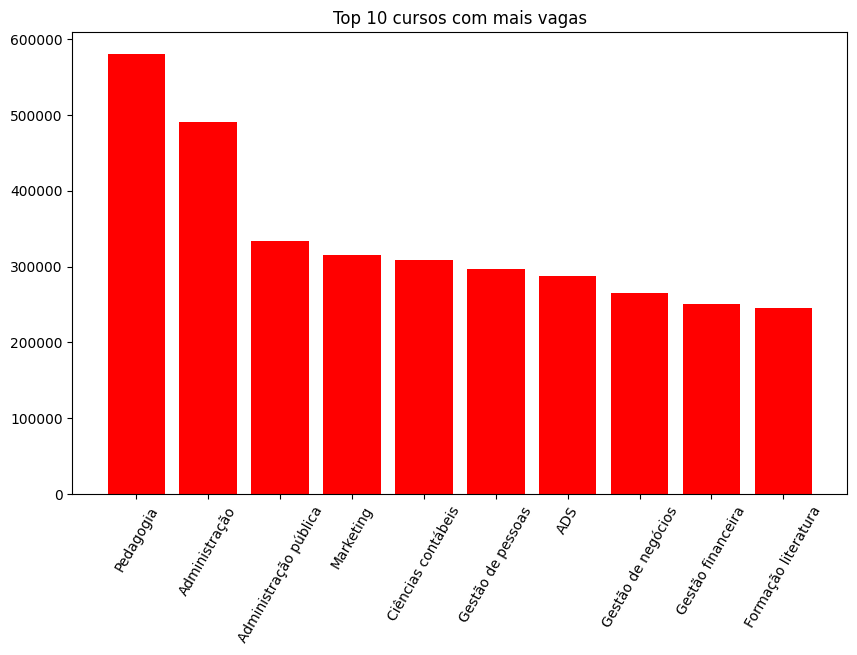

In [9]:
import matplotlib.pyplot as plt


modalidade = vagas_modalidade["curso"]   
qt = vagas_modalidade["qt"]
plt.figure(figsize=(10, 6))
plt.title("Top 10 cursos com mais vagas")
plt.bar(modalidade, qt, color='red', width=0.8)
plt.xticks(rotation=60)
plt.show()